In [120]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
import math
import sys
#from fbprophet import Prophet

In [109]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults,ARIMA
from pmdarima import auto_arima 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Stima giugno con Prophet

In [66]:
u6 = pd.read_excel('u6_agg_ore.xlsx')

In [67]:
u6_df = u6.copy()
u6_df['YEAR'] = u6_df['DATA'].dt.year
u6_df['MONTH'] = u6_df['DATA'].dt.month
u6_df['DAY'] = u6_df['DATA'].dt.day

In [68]:
u6_df['DATE_TIME'] = pd.to_datetime({'year':u6_df['YEAR'], 'month':u6_df['MONTH'], 'day':u6_df['DAY'], 'hour':u6_df['ORA']})

In [69]:
u6_df = u6_df[['DATE_TIME', 'CONSUMO_KWH_U6']]
u6_df.columns = ['ds','y']
u6_train = u6_df[u6_df['ds']<'2020-06-01']

In [70]:
u6_train=u6_train.set_index('ds').resample('D').sum()
u6_train.index = u6_train.index.to_period('D')

In [6]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.add_country_holidays(country_name='IT')
m.fit(u6_train)
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future)

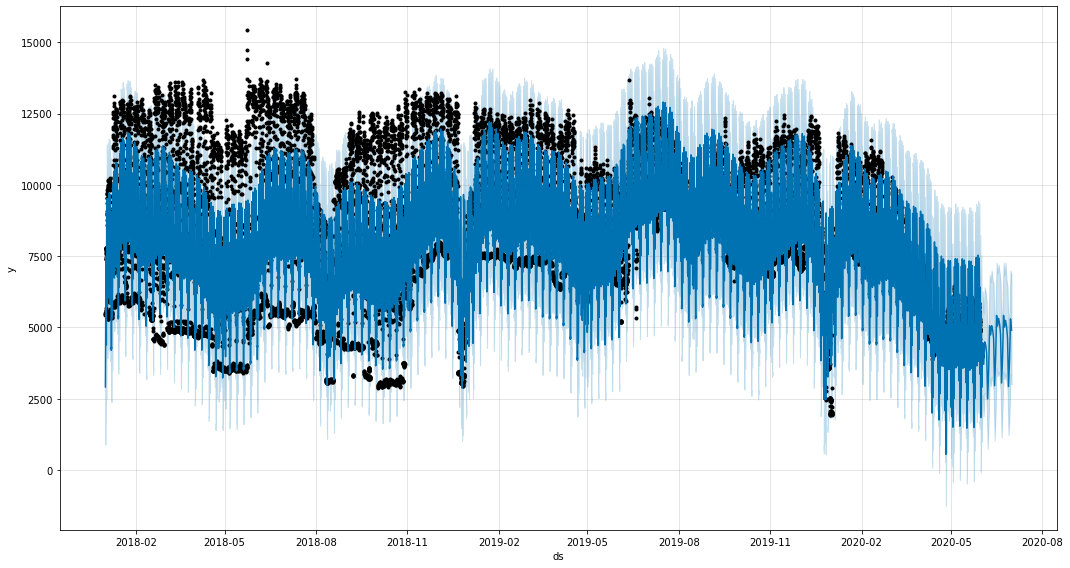

In [7]:
fig1 = m.plot(forecast, figsize=(15,8))

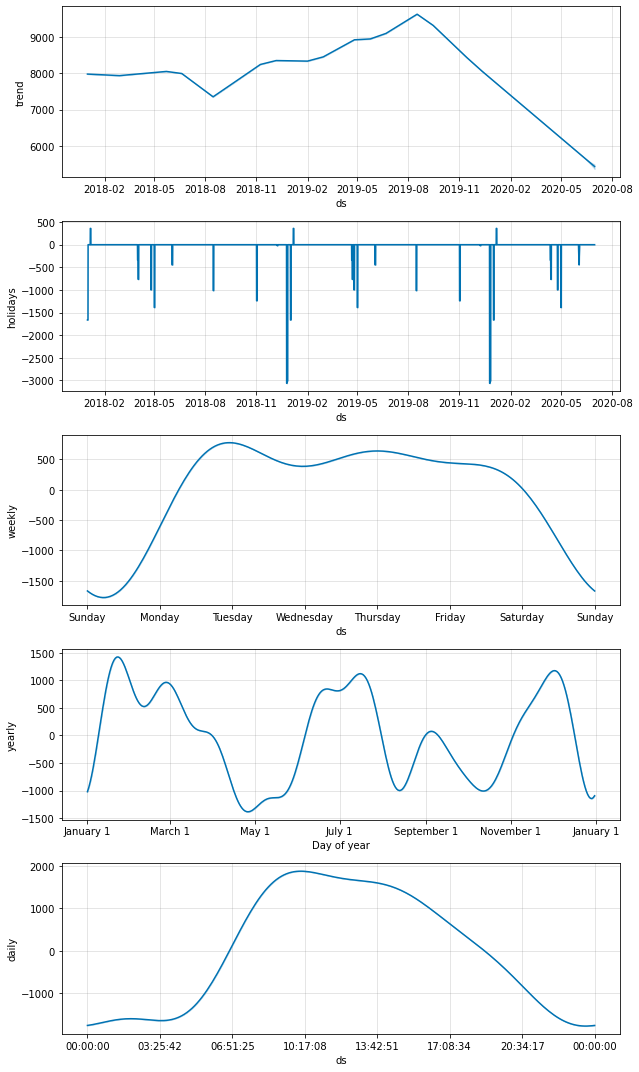

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [10]:
forecast['ds'] = pd.to_datetime(forecast['ds'], format='%Y-%m-%d')
forecast = forecast.set_index('ds')

In [11]:
u6_train = u6_df.copy()
u6_train.drop(list(range(21169,21888)), inplace=True)
u6_train = u6_train.set_index('ds')
forecast = forecast.loc['2020-06-01':]
forecast.rename(columns = {'yhat' : 'fbProphet Forecast', 'yhat_lower' : 'fbProphet Forecast Lower bound',  'yhat_upper' : 'fbProphet Forecast Upper bound'}, inplace = True)

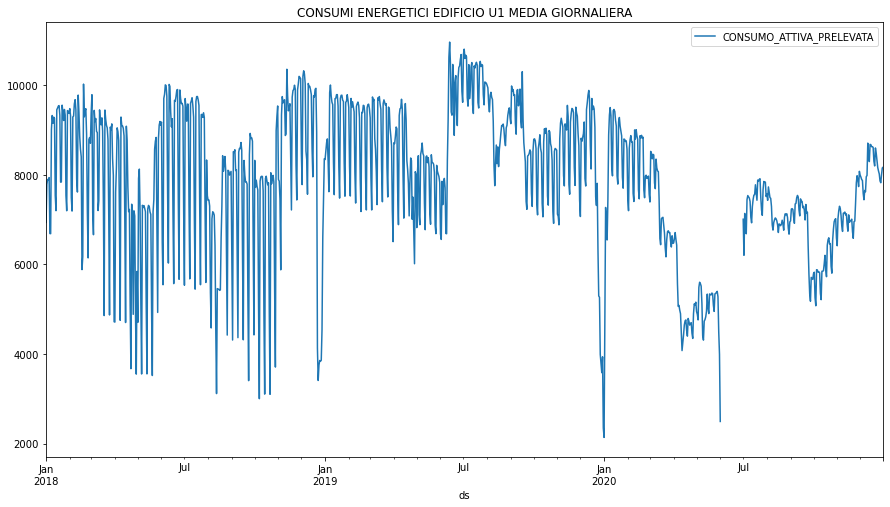

In [12]:
title=f'CONSUMI ENERGETICI EDIFICIO U1 MEDIA GIORNALIERA'
ylabel='KWH'
xlabel='' 
u6_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u6_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)

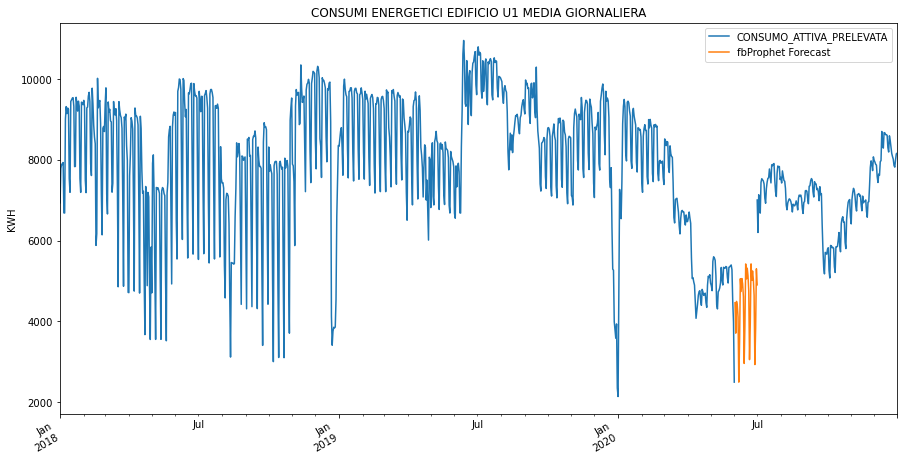

In [13]:
title=f'CONSUMI ENERGETICI EDIFICIO U1 MEDIA GIORNALIERA'
ylabel='KWH'
xlabel='' 
u6_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u6_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)
forecast['fbProphet Forecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

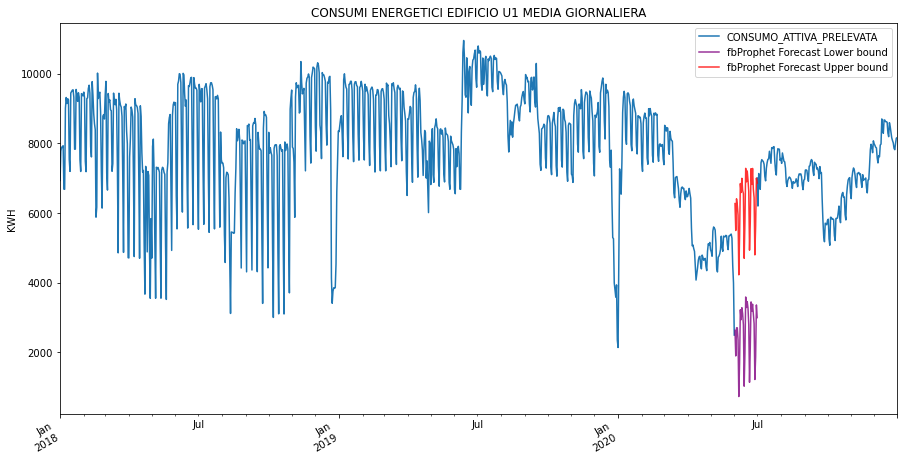

In [14]:
title=f'CONSUMI ENERGETICI EDIFICIO U1 MEDIA GIORNALIERA'
ylabel='KWH'
xlabel='' 
u6_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u6_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)
forecast['fbProphet Forecast Lower bound'].plot(legend=True, color='purple', alpha=0.8)
forecast['fbProphet Forecast Upper bound'].plot(legend=True, color='red', alpha=0.8)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [15]:
prima_parte = u6_df[u6_df['ds']<'2020-06-01']
prima_parte = prima_parte.set_index('ds').resample(rule='d').sum()
prima_parte.reset_index(inplace=True)

In [16]:
seconda_parte = forecast.reset_index()[['ds','fbProphet Forecast Upper bound']]
seconda_parte['ds'] = seconda_parte['ds'].dt.date
seconda_parte = seconda_parte.rename(columns = {'fbProphet Forecast Upper bound' : 'y'})
seconda_parte['y'] = round(seconda_parte['y']*24,2)

In [17]:
terza_parte = u6_df[u6_df['ds']>'2020-07-01']
terza_parte = terza_parte.set_index('ds').resample(rule='d').sum()
terza_parte.reset_index(inplace=True)

In [18]:
u6_corretto = pd.concat([prima_parte, seconda_parte, terza_parte])
u6_corretto['ds'] = pd.to_datetime(u6_corretto['ds'], format = '%Y%m%d %H:%M:%S')
#u6_corretto.to_excel(r'C:\Users\Nabil-PC\Downloads\Progetto Lab\u6_corretto.xlsx', index = False)
#dataset corretto per edificio U6 con la stima di giugno 2020

Stima dei consumi nel periodo COVID per l'edificio U6.

In [75]:
u6=pd.read_excel('u6_corretto.xlsx')

In [76]:
u6_train = u6_df[u6_df['ds']<'2020-03-01']

In [20]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.add_country_holidays(country_name='IT')
m.fit(u6_train)
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

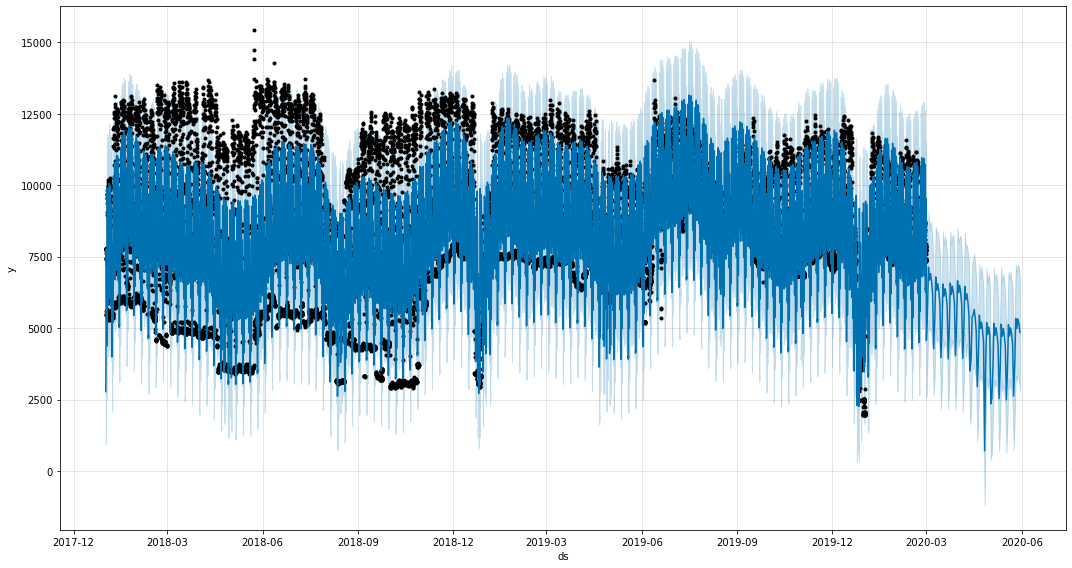

In [21]:
fig1 = m.plot(forecast, figsize=(15,8))

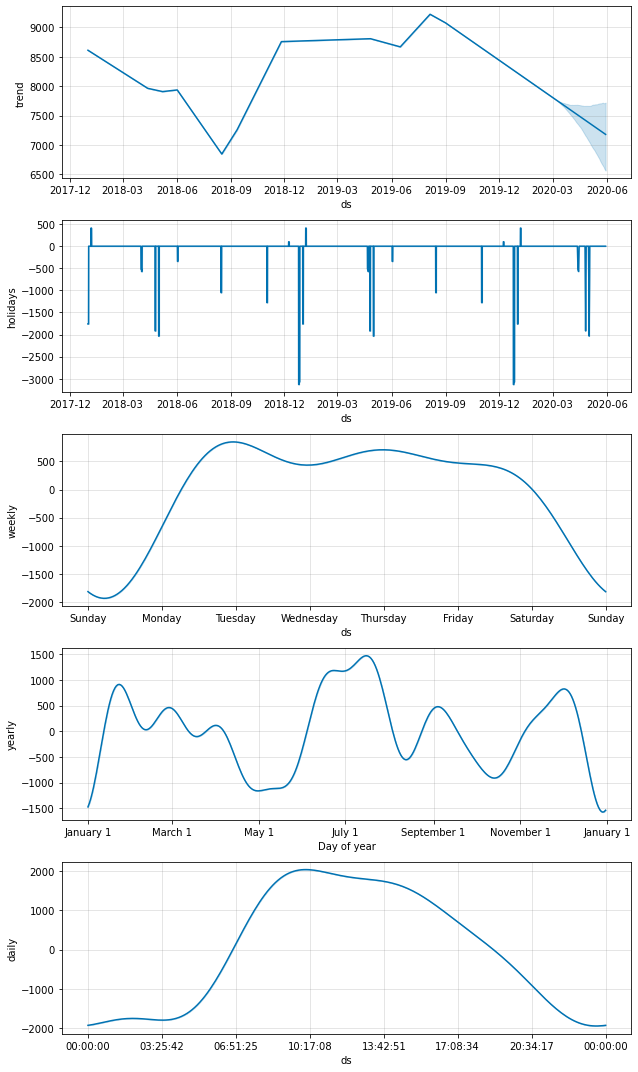

In [22]:
fig2 = m.plot_components(forecast)

In [23]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [24]:
forecast['ds'] = pd.to_datetime(forecast['ds'], format='%Y-%m-%d')
forecast = forecast.set_index('ds')

In [25]:
u6_train = u6_df[u6_df['ds']<'2020-06-01']
u6_train = u6_train.set_index('ds')
forecast = forecast.loc['2020-03-01':]
forecast.rename(columns = {'yhat' : 'fbProphet Forecast', 'yhat_lower' : 'fbProphet Forecast Lower bound',  'yhat_upper' : 'fbProphet Forecast Upper bound'}, inplace = True)

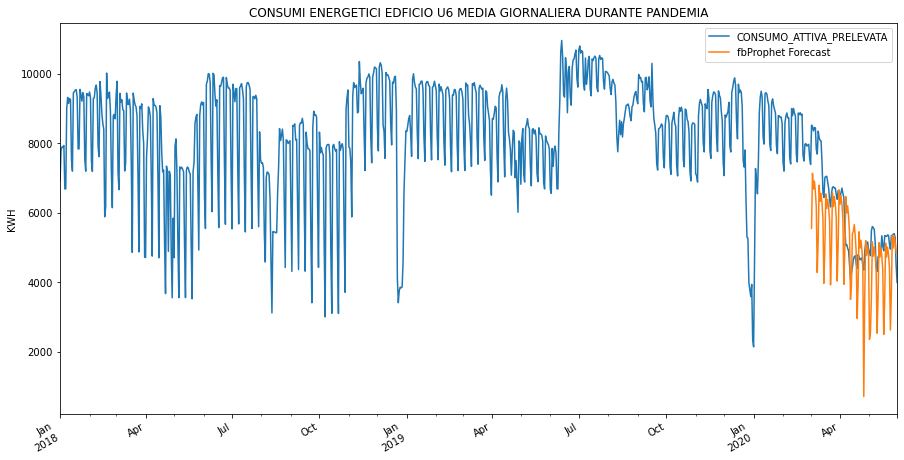

In [26]:
title=f'CONSUMI ENERGETICI EDFICIO U6 MEDIA GIORNALIERA DURANTE PANDEMIA'
ylabel='KWH'
xlabel='' 
u6_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u6_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)
forecast['fbProphet Forecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

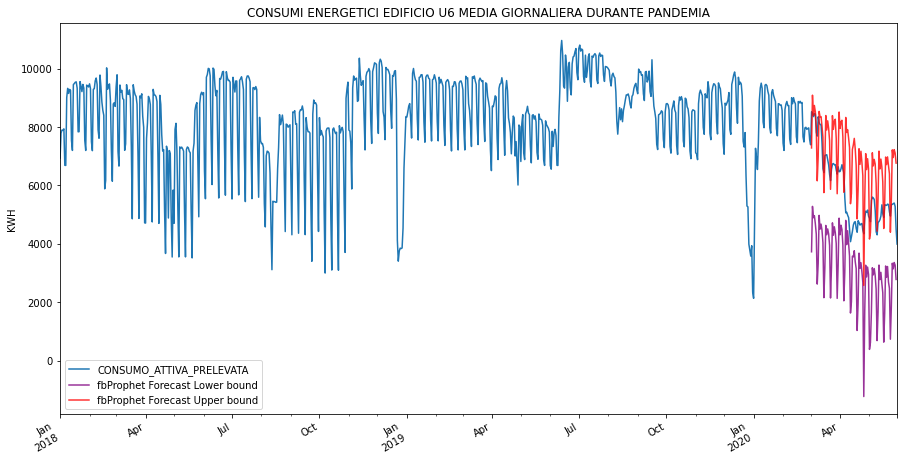

In [27]:
title=f'CONSUMI ENERGETICI EDIFICIO U6 MEDIA GIORNALIERA DURANTE PANDEMIA'
ylabel='KWH'
xlabel='' 
u6_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u6_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)
forecast['fbProphet Forecast Lower bound'].plot(legend=True, color='purple', alpha=0.8)
forecast['fbProphet Forecast Upper bound'].plot(legend=True, color='red', alpha=0.8)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Stima dei consumi nel periodo COVID per l'edificio U1.

In [81]:
u1 = pd.read_excel('u1_agg_ore.xlsx')

In [82]:
u1_df = u1.copy()
u1_df['YEAR'] = u1_df['DATA'].dt.year
u1_df['MONTH'] = u1_df['DATA'].dt.month
u1_df['DAY'] = u1_df['DATA'].dt.day

In [83]:
u1_df['DATE_TIME'] = pd.to_datetime({'year':u1_df['YEAR'], 'month':u1_df['MONTH'], 'day':u1_df['DAY'], 'hour':u1_df['ORA']})

In [84]:
u1_df

,DATA,ORA,CONSUMO_KWH_U1,YEAR,MONTH,DAY,DATE_TIME
0,2018-01-01,0,3870.00,2018,1,1,2018-01-01 00:00:00
1,2018-01-01,1,3861.00,2018,1,1,2018-01-01 01:00:00
2,2018-01-01,2,3843.00,2018,1,1,2018-01-01 02:00:00
3,2018-01-01,3,3816.00,2018,1,1,2018-01-01 03:00:00
4,2018-01-01,4,3852.00,2018,1,1,2018-01-01 04:00:00
...,...,...,...,...,...,...,...
26299,2020-12-31,19,8241.75,2020,12,31,2020-12-31 19:00:00
26300,2020-12-31,20,8283.00,2020,12,31,2020-12-31 20:00:00
26301,2020-12-31,21,8208.75,2020,12,31,2020-12-31 21:00:00
26302,2020-12-31,22,8010.75,2020,12,31,2020-12-31 22:00:00


In [85]:
u1_df = u1_df[['DATE_TIME', 'CONSUMO_KWH_U1']]
u1_df.columns = ['ds','y']
u1_train = u1_df[u1_df['ds']<'2020-03-01']

In [33]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.add_country_holidays(country_name='IT')
m.fit(u1_train)
future = m.make_future_dataframe(periods=300, freq='D')
forecast = m.predict(future)

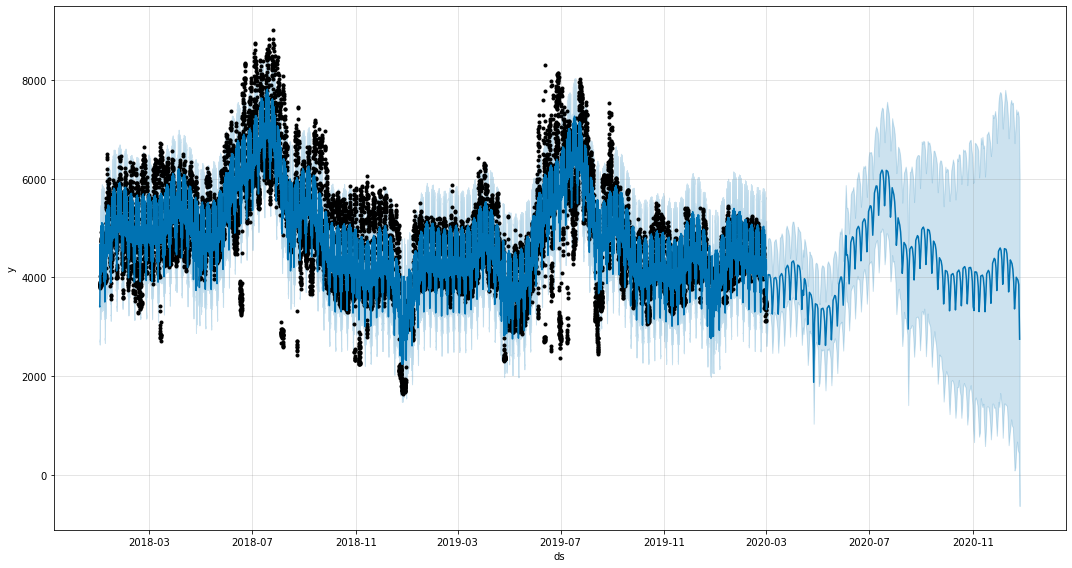

In [34]:
fig1 = m.plot(forecast, figsize=(15,8))

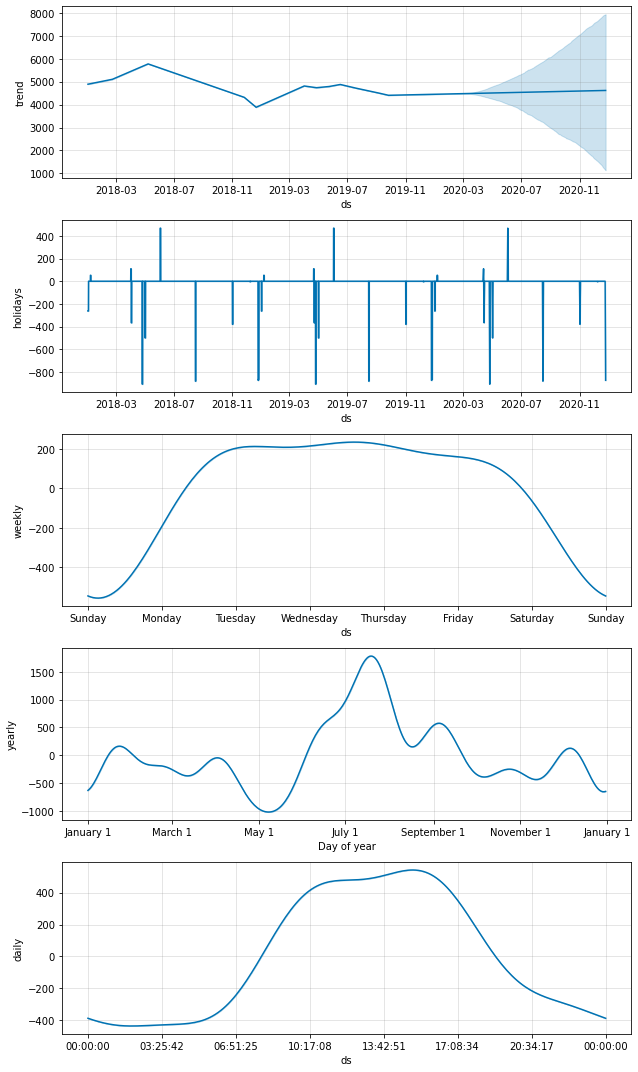

In [35]:
fig2 = m.plot_components(forecast)

In [36]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [37]:
forecast['ds'] = pd.to_datetime(forecast['ds'], format='%Y-%m-%d')
forecast = forecast.set_index('ds')

In [38]:
u1_train = u1_df.set_index('ds')
forecast = forecast.loc['2020-03-01':]
forecast.rename(columns = {'yhat' : 'fbProphet Forecast', 'yhat_lower' : 'fbProphet Forecast Lower bound',  'yhat_upper' : 'fbProphet Forecast Upper bound'}, inplace = True)

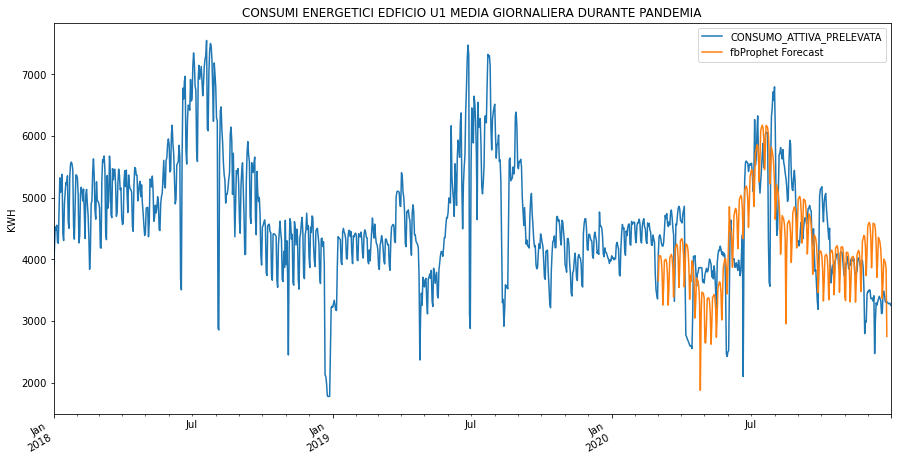

In [39]:
title=f'CONSUMI ENERGETICI EDFICIO U1 MEDIA GIORNALIERA DURANTE PANDEMIA'
ylabel='KWH'
xlabel='' 
u1_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u1_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)
forecast['fbProphet Forecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

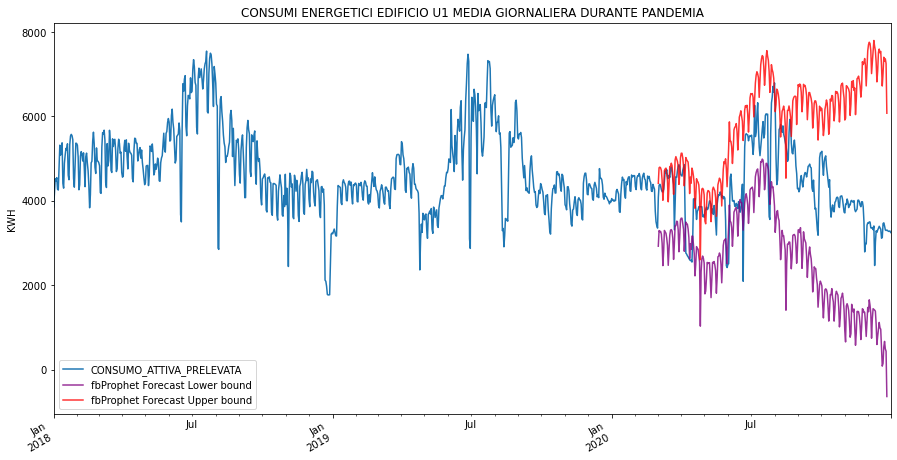

In [40]:
title=f'CONSUMI ENERGETICI EDIFICIO U1 MEDIA GIORNALIERA DURANTE PANDEMIA'
ylabel='KWH'
xlabel='' 
u1_train.columns = ['CONSUMO_ATTIVA_PRELEVATA']
ax = u1_train.resample('d').mean().plot(legend=True,figsize=(15,8),title=title)
forecast['fbProphet Forecast Lower bound'].plot(legend=True, color='purple', alpha=0.8)
forecast['fbProphet Forecast Upper bound'].plot(legend=True, color='red', alpha=0.8)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Valutazione del modello (U1)

In [41]:
u1_train = u1_df[u1_df['ds'] >= '2020-03-01']
u1_train = u1_train[u1_train['ds'] < '2020-12-26']
u1_train = u1_train.set_index('ds').resample(rule='d').sum()
u1_train.reset_index(inplace=True)

In [42]:
fitted = (forecast['fbProphet Forecast']*24).reset_index()

In [117]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [44]:
mape = mean_absolute_percentage_error(u1_train['y'], fitted['fbProphet Forecast'])

In [45]:
mape

15.877064523690976

Stima rolling

In [88]:
u1_train = u1_df[u1_df['ds'] < '2020-03-01']
u1_test = u1_df[u1_df['ds'] >= '2020-03-01']
u1_test = u1_test.set_index('ds').resample(rule='d').sum()
u1_train = u1_train.set_index('ds').resample(rule='d').sum()

In [90]:
auto=auto_arima(u1_train)
param=auto.order

In [104]:
history = [x for x in u1_train['y']]
predictions = list()
for t in range(len(u1_test)):
    model = ARIMA(history, order=param)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = u1_test.iloc[t].y
    history.append(obs)

In [105]:
u1_test['predictions']=predictions
u1_test['predictions']=u1_test['predictions'].astype('float')

In [118]:
mape = mean_absolute_percentage_error(u1_test['y'], u1_test['predictions'])
mape

5.836450329261608

In [106]:
final=pd.concat([u1_train,u1_test], axis=0)

In [142]:
final.rename(columns = {'y':'Potenza Attiva Prelevata', 'predictions':'Previsione Metodo Rolling'})

,Potenza Attiva Prelevata,Previsione Metodo Rolling
ds,,
2018-01-01,92592.00,NaN
2018-01-02,100917.00,NaN
2018-01-03,108558.00,NaN
2018-01-04,107226.00,NaN
2018-01-05,109242.00,NaN
...,...,...
2020-12-27,188694.00,193800.692904
2020-12-28,187728.75,190236.644477
2020-12-29,192060.00,190238.470242


/Users/mario/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


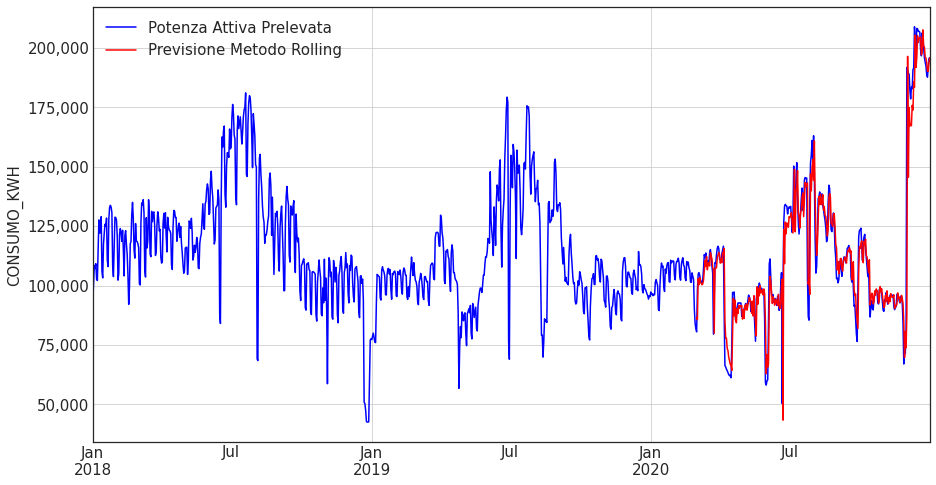

In [150]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='CONSUMO_KWH'
xlabel='' 
final.columns = ['Potenza Attiva Prelevata', 'Previsione Metodo Rolling']
ax = final['Potenza Attiva Prelevata'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
final['Previsione Metodo Rolling'].plot(legend=True,title=title, color ='red')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);